In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [37]:
urltrain = 'C:/heregoesyourpath/fruits-360_dataset/fruits-360/Training'

In [45]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    urltrain,
    validation_split = 0.2,
    subset = 'training',
    image_size = (100, 100),
    seed = 42,
    batch_size= 32
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [48]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    urltest,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (100, 100),
    seed = 42,
    batch_size= 32
)

Found 22689 files belonging to 131 classes.
Using 4537 files for validation.


In [63]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [22]:
class_names2 = val_ds.class_names
print(class_names2)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [23]:
%matplotlib inline

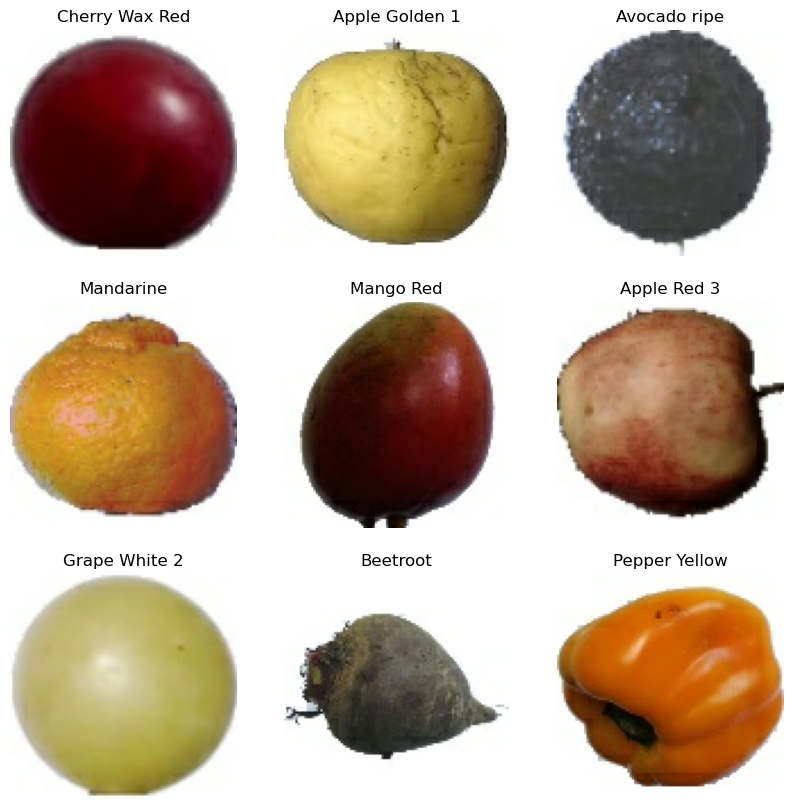

In [24]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [39]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

In [41]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 64)      

In [51]:
epochs=10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/10
1693/1693 [==============================] - 146s 86ms/step - loss: 0.0487 - accuracy: 0.9907 - val_loss: 0.8388 - val_accuracy: 0.9032
Epoch 2/10
1693/1693 [==============================] - 161s 95ms/step - loss: 0.0750 - accuracy: 0.9887 - val_loss: 0.7729 - val_accuracy: 0.9295
Epoch 3/10
1693/1693 [==============================] - 168s 99ms/step - loss: 0.0663 - accuracy: 0.9913 - val_loss: 0.8713 - val_accuracy: 0.9381
Epoch 4/10
1693/1693 [==============================] - 169s 100ms/step - loss: 0.0676 - accuracy: 0.9913 - val_loss: 0.9992 - val_accuracy: 0.9420
Epoch 5/10
1693/1693 [==============================] - 170s 100ms/step - loss: 0.0800 - accuracy: 0.9921 - val_loss: 1.1298 - val_accuracy: 0.9301
Epoch 6/10
1693/1693 [==============================] - 167s 99ms/step - loss: 0.0665 - accuracy: 0.9929 - val_loss: 0.9536 - val_accuracy: 0.9462
Epoch 7/10
1693/1693 [==============================] - 164s 97ms/step - loss: 0.0860 - accuracy: 0.9926 - val_loss:

In [17]:
# %pip install pyyaml h5py  
# Required to save models in HDF5 format

Note: you may need to restart the kernel to use updated packages.


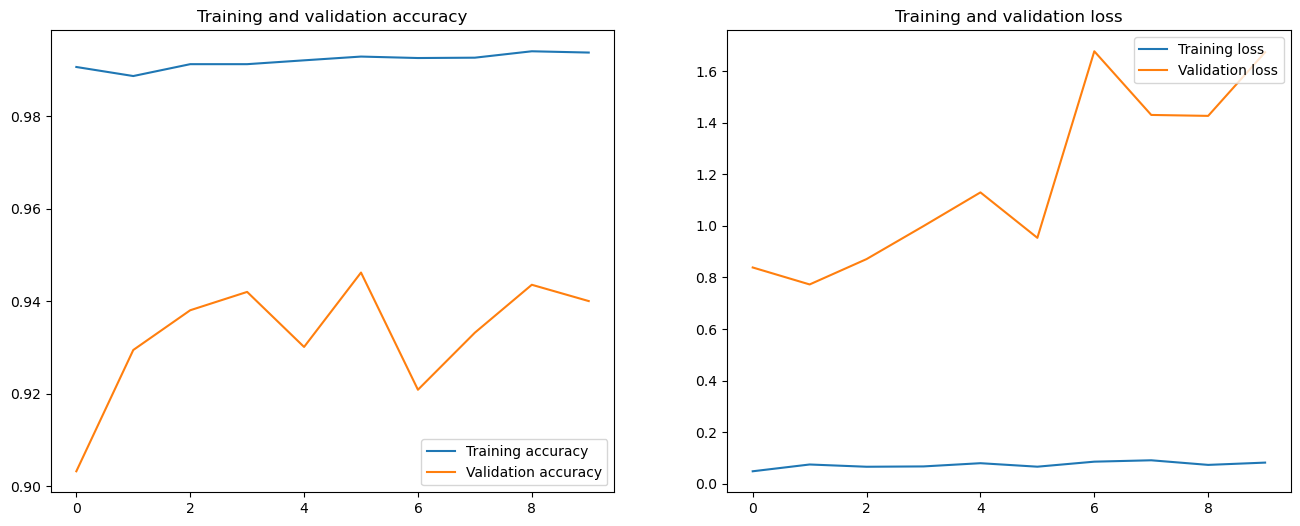

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

In [62]:
model.save('modelfruit.h5') 

In [54]:
model = tf.keras.models.load_model('modelfruit.h5')

In [55]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    url,
    validation_split = 0.2,
    subset = 'training',
    image_size = (100, 100),
    seed = 42,
    batch_size= 32
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [56]:
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [57]:
test_apple_url = "C:/Users/te533640/Documents/personal/6sem/RN/proyecto/fruits-360_dataset/fruits-360/Test/Apple Golden 3/78_100.jpg"
img = tf.keras.utils.load_img(test_apple_url, target_size=(100, 100))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch

predictions_apple = model.predict(img_array)
score_apple = tf.nn.softmax(predictions_apple[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_apple)], 100 * np.max(score_apple))
)

1/1 [==============================] - 0s 61ms/step
This image most likely is a Apple Golden 3 with a 2.05 percent confidence.


In [58]:
test_url = "C:/Users/te533640/Documents/personal/6sem/RN/proyecto/fruits-360_dataset/fruits-360/Test/"

test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_url, 
    seed = 42, 
    image_size=(100,100),
    shuffle=False #No shuffling for classification report
)

Found 22689 files belonging to 131 classes.


In [59]:
test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

710/710 [==============================] - 17s 24ms/step


In [60]:
results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

710/710 [==============================] - 19s 26ms/step - loss: 1.8240 - accuracy: 0.9383
Test loss, test acc: [1.8240180015563965, 0.9382960796356201]


In [32]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
%pip install tensorflowjs

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\AI\\Lib\\site-packages\\~ensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Consider using the `--user` option or check the permissions.



     -------------------------------------- 85.1/85.1 kB 598.7 kB/s eta 0:00:00
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
     ---------------------------------------- 1.3/1.3 MB 4.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 100.6/100.6 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB ? eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 84.2/8

In [ ]:
#Crear carpeta donde se colocaran los archivos resultantes
%mkdir output

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras perros-gatos.h5 carpeta_salida

In [ ]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

#Para descargarlos, da clic del lado izquierdo en el icono de la carpeta
#y expande carpeta_salida. En los archivos utiliza los 3 puntos para descargarlos